In [2]:
import pandas            as pd
import pandasql          as psql
import numpy             as np
import os
import datetime
import time
import math
import IPython

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


from   IPython.core.display           import display, HTML
from   decimal                        import Decimal

pd.set_option('display.max_columns' , 500)
pd.set_option('display.max_rows'    , 5000)
pd.set_option('display.max_colwidth', None)

print('Setting is done:')


#------------------------------------
print('Make the notebook html as wide as possible')
display(HTML("<style>.container { width:100% !important; }</style>"))
print()

script_dir = os.getcwd()
print(script_dir)

Setting is done:
Make the notebook html as wide as possible



G:\Meine Ablage\price_anomaly_detection


In [3]:
df = pd.read_csv(script_dir +'/TSLA.CSV/')

In [6]:
from sklearn.cluster import KMeans
from numpy import sqrt, array, random, argsort
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np

In [21]:
kmeans[4]

KMeans(n_clusters=5)

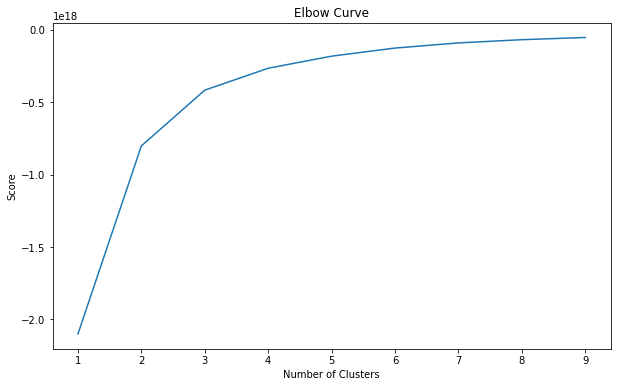

In [12]:
data = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
n_cluster = range(1, 10)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

In [54]:
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=5)
km.fit(X)
km.predict(X)
labels = km.labels_
# #Plotting
# fig = plt.figure(1, figsize=(7,7))
# ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
# ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
#           c=labels.astype(np.float), edgecolor="k")
# ax.set_xlabel("price_usd")
# ax.set_ylabel("srch_booking_window")
# ax.set_zlabel("srch_saturday_night_bool")
# plt.title("K Means", fontsize=14);

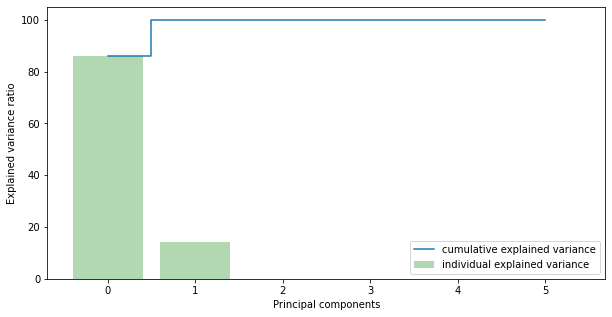

In [55]:
data = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
X = data.values
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

<ipython-input-53-ea2ecdddc73c>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distance = pd.Series()


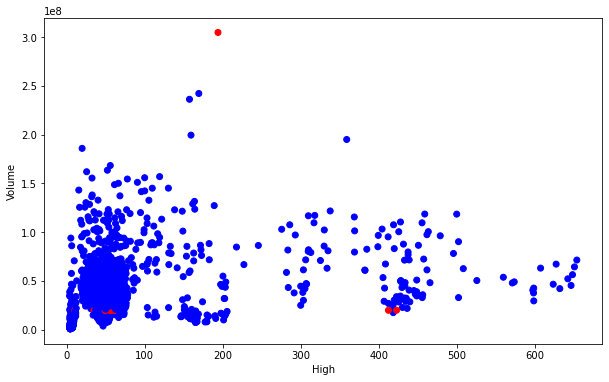

In [53]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i] =  np.linalg.norm(Xa-Xb)
    return distance

outliers_fraction = 0.015 #############nochmal checken warum wir 0.015 nehmen in Quelle (evtl. abändern)
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[4])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df['anomaly1'] = (distance >= threshold).astype(int)

# visualisation of anomaly with cluster view
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['High'], df['Volume'], c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('High')
plt.ylabel('Volume')
plt.show();

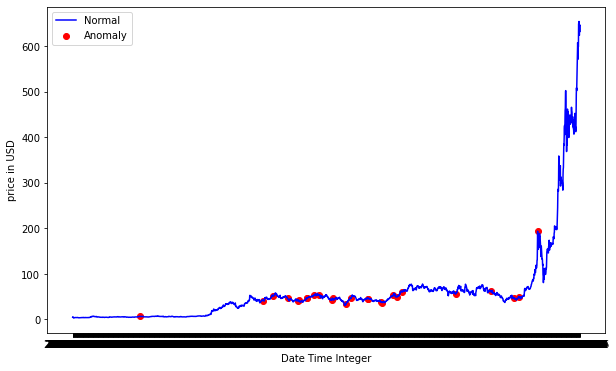

In [68]:
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly1'] == 1, ['Date', 'High']] #anomaly

ax.plot(df['Date'], df['High'], color='blue', label='Normal')
ax.scatter(a['Date'],a['High'], color='red', label='Anomaly')
plt.xlabel('Date Time Integer')
plt.ylabel('price in USD')
plt.legend()
plt.show();